In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [5]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [6]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [7]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [8]:
cat

['Type']

In [9]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [12]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [13]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [14]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.shape

(109143, 13)

In [17]:
xtest.shape

(27286, 13)

In [18]:
ytrain.value_counts()

Machine failure
0                  107433
1                    1710
Name: count, dtype: int64

In [19]:
ytest.value_counts()

Machine failure
0                  26848
1                    438
Name: count, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

In [21]:
lr.score(xtrain, ytrain)

0.9810248939464739

In [22]:
lr.score(xtest, ytest)

0.9806127684526864

In [23]:
ypred_tr = lr.predict(xtrain)
ypred_ts = lr.predict(xtest)

In [24]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [25]:
ytest[0:5]

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [26]:
c = lr.classes_
c

array([0, 1], dtype=int64)

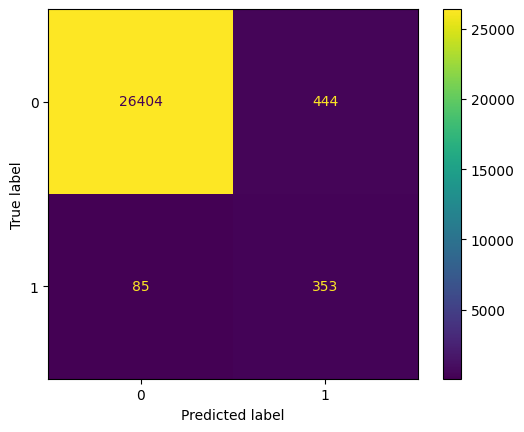

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     26848
           1       0.44      0.81      0.57       438

    accuracy                           0.98     27286
   macro avg       0.72      0.89      0.78     27286
weighted avg       0.99      0.98      0.98     27286



In [31]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'class_weight':['balanced']}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(LogisticRegression(), param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['balanced']},
                   scoring='f1')

In [33]:
rscv.best_score_

0.7133743265361934

In [34]:
rscv.best_params_

{'class_weight': 'balanced', 'C': 0.001}

In [35]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.001, class_weight='balanced')

In [36]:
ypred_ts = best_lr.predict(xtest)

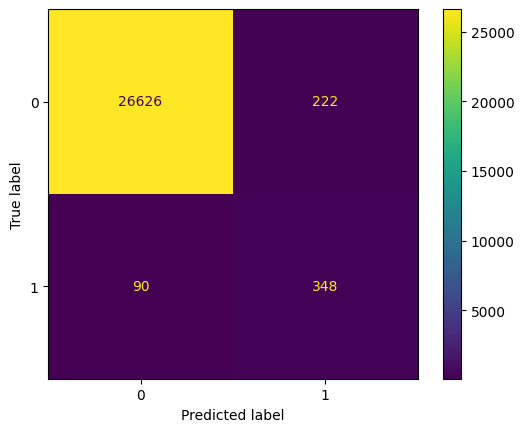

In [37]:
cf2 = confusion_matrix(ytest, ypred_ts)
cfd2 = ConfusionMatrixDisplay(cf2, display_labels=c)
cfd2.plot()

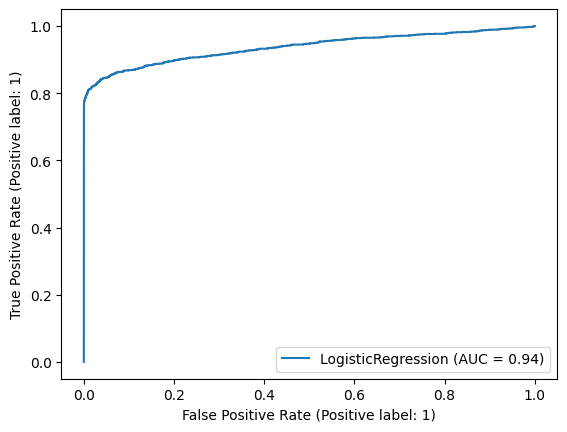

In [38]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

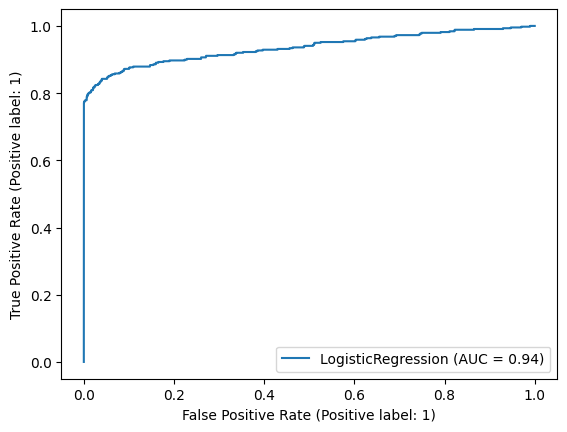

In [39]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_lr, xtrain, ytrain, cv=10, scoring='roc_auc')
scores

array([0.93415337, 0.94718826, 0.92011099, 0.93639106, 0.95758206,
       0.95269598, 0.93121646, 0.92504789, 0.90180849, 0.94471989])

In [43]:
scores.mean()

0.9350914454618835

In [44]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [45]:
ypred_ts = lr.predict(xtest)

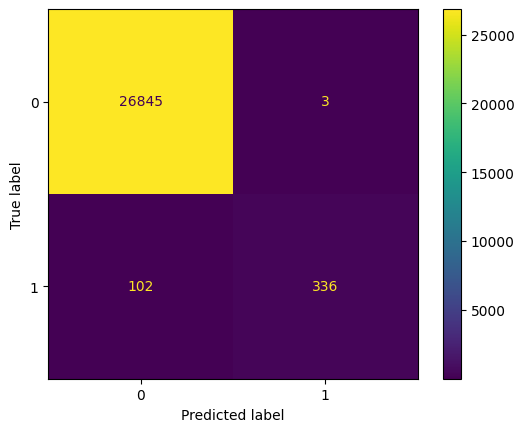

In [46]:
cf3 = confusion_matrix(ytest, ypred_ts)
cfd3 = ConfusionMatrixDisplay(cf3, display_labels=c)
cfd3.plot()

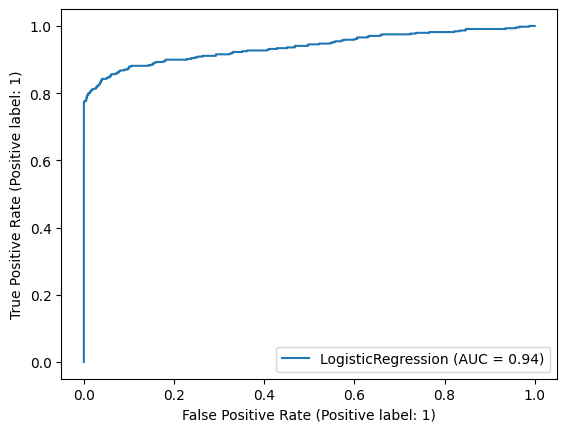

In [47]:
RocCurveDisplay.from_estimator(lr, xtest, ytest)

In [48]:
#Setting the range for class weights
import numpy as np
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

In [49]:
rscv2 = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, cv=5, scoring='f1')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'class_weight': [{0: 0.0, 1: 1.0},
                                                         {0: 0.004974874371859297,
                                                          1: 0.9950251256281407},
                                                         {0: 0.009949748743718593,
                                                          1: 0.9900502512562814},
                                                         {0: 0.014924623115577889,
                                                          1: 0.9850753768844221},
                                                         {0: 0.019899497487437186,
                                                          1: 0.9801005025125629},
                                                         {0: 0.024874371859296484,
                                                          1: 0.9751256281407035},
                                                         {0: 0.029849246...
                                                          1: 0.8905527638190954},
                                                         {0: 0.11442211055276383,
                                                          1: 0.8855778894472361},
                                                         {0: 0.11939698492462311,
                                                          1: 0.8806030150753769},
                                                         {0: 0.12437185929648241,
                                                          1: 0.8756281407035176},
                                                         {0: 0.1293467336683417,
                                                          1: 0.8706532663316583},
                                                         {0: 0.13432160804020102,
                                                          1: 0.865678391959799},
                                                         {0: 0.1392964824120603,
                                                          1: 0.8607035175879397},
                                                         {0: 0.1442713567839196,
                                                          1: 0.8557286432160804}, ...]},
                   scoring='f1')

In [50]:
rscv2.best_score_

0.862513786746223

In [51]:
rscv2.best_params_

{'class_weight': {0: 0.5273366834170854, 1: 0.4726633165829146}}

In [52]:
best_lr = rscv2.best_estimator_
best_lr

LogisticRegression(class_weight={0: 0.5273366834170854, 1: 0.4726633165829146})

In [54]:
ypred_ts = best_lr.predict(xtest)

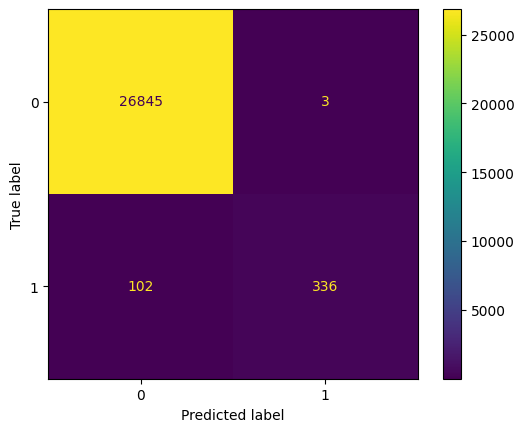

In [55]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()